# YOUTUBE ANALYSIS - CASE STUDY

Let's Get started

In [2]:
# Import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import the files
comments = pd.read_csv(r'C:\Data_Analyst_Learning\Data-Analyst-Course\Projects\Udemy course Projects\Youtube Case Study\Youtube_project_Resource\Youtube_project_shan_singh/UScomments.csv',error_bad_lines= False)

C:\Users\Sourav Vishwakarma\AppData\Local\Temp\ipykernel_2604\2765530792.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments = pd.read_csv(r'C:\Data_Analyst_Learning\Data-Analyst-Course\Projects\Udemy course Projects\Youtube Case Study\Youtube_project_Resource\Youtube_project_shan_singh/UScomments.csv',error_bad_lines= False)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\Sourav Vishwakarma\AppData\Local\Temp\ipykernel_2604\2765530792.py:2: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv(r'C:\Data_Analy

In [4]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


Let's Perform the sentimental Analysis

In [4]:
# Polarity of comments lies [-1,+1]
# Sentimental Analysis is just to examine the sentiments of the users
# To perform the sentimental analysis :
# Packages  : 
# 1. TextBlob - NLP library
# 2. Spacy
# 3. Vader

In [5]:
# Check for missing values
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [6]:
# Drop missing values
comments.dropna(inplace = True)

In [7]:
# Install TextBlob package
#pip install textblob -- Anaconda prompt

In [8]:
from textblob import TextBlob

In [9]:
TextBlob('trending 😉').sentiment.polarity

0.0

In [10]:
polarity = []
for comment in comments['comment_text']:
    try:
       polarity.append(TextBlob(comment).sentiment.polarity) 
    except:
        polarity.append(0)

In [11]:
print(polarity[0:20])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573, 0.0, 0.2, -0.023333333333333352, 0.5, 0.0, 0.8, -0.2916666666666667, 0.0, 0.25, -0.8]


In [12]:
comments['polarity'] = polarity

In [13]:
comments.shape

(691375, 5)

In [14]:
comments.head(10)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


## WordCloud representation of Sentiments

In [15]:
## Lets perform EDA for the Negative and positive sentences

In [20]:
comments_positive = comments[comments['polarity'] == 1]

In [26]:
comments_positive.head(5)

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [22]:
comments_negative = comments[comments['polarity'] == -1]

In [25]:
comments_negative.head(5)

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


In [27]:
#!pip install wordcloud

# to install the package wordcloud

     ------------------------------------ 153.1/153.1 kB 763.8 kB/s eta 0:00:00


In [28]:
from wordcloud import WordCloud, STOPWORDS

In [29]:
comments_negative['comment_text']

512       BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562       Well… The brain surgeon Ben Carson just proved...
952              WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                         WTF BRUH!!!!!!
1391                        cheeseus christ thats insane!!!
                                ...                        
690788                                  Like Kelly she evil
690865                       R U FUCKING KIDDING ME?!?!?!?!
691073             This is horribly offensive please report
691180    Sink holes looks terrifying sinkholes sink you...
691224    Trump talked to the president of US Virgin Isl...
Name: comment_text, Length: 3508, dtype: object

In [32]:
total_comments = ' '.join(comments_negative['comment_text'])
total_comments[:100]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! "

(-0.5, 399.5, 199.5, -0.5)

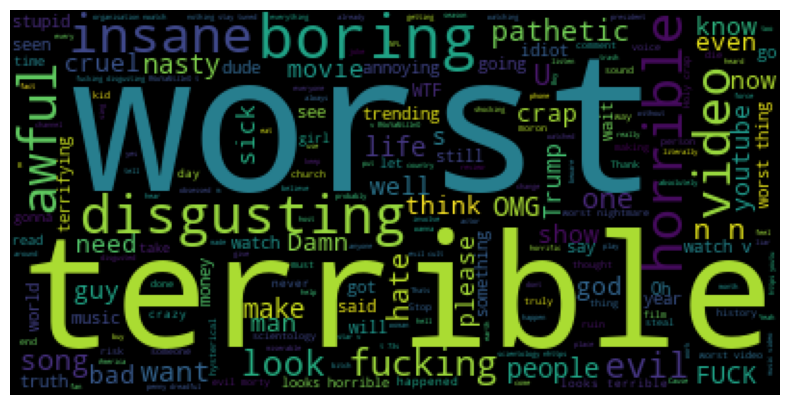

In [37]:
wc = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize= (15,5))
plt.imshow(wc)
plt.axis('off')

In [38]:
## Conclusion--> Users are emphasizing more on Terrible , worst ,horrible ,boring , disgusting etc..

In [40]:
total_comments2=' '.join(comments_positive['comment_text'])
total_comments2[:100]

'yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as bes'

(-0.5, 399.5, 199.5, -0.5)

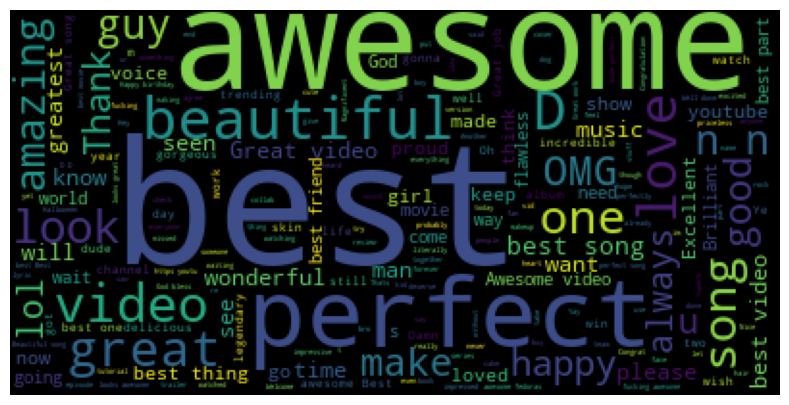

In [41]:
wc =WordCloud(stopwords=set(STOPWORDS)).generate(total_comments2)
plt.figure(figsize=(15,5))
plt.imshow(wc)
plt.axis('off')

## Perform Emoji's Analysis

In [1]:
!pip install emoji

     ------------------------------------ 240.9/240.9 kB 985.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234912 sha256=d56951ef65b21c84c05d5be53b8648b078b227aefbb68de8f5ff8c3ab610e010
  Stored in directory: c:\users\sourav vishwakarma\appdata\local\pip\cache\wheels\9a\b8\0f\f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [7]:
import emoji

In [6]:
comments.head(10)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0


In [8]:
print('\U0001F600')

😀


Note-->> Every emoji has a Unicode associated with it
 '\U0001F600' is a unicode for 😀

 Unicode-->>The Unicode Standard provides a unique number for every character ,ie 
           Unicode is a universal character encoding standard that assigns a code to every character and symbol in every language

In [10]:
comment = 'trending 😉'

In [11]:
comment

'trending 😉'

######### NOT WORKING

## Collect Entire data of Youtube 